In [1]:
import random
import numpy
import gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
from IPython import display

In [2]:
def policy(obs, Q_table : dict, N_table : dict, e=0.9):
    if str(obs) not in Q_table:
        Q_table.update({str(obs): [0, 0]})
        N_table.update({str(obs): [0, 0]})
    state = str(obs)
    actions_space = Q_table[state]
    num = N_table[state]
    
    action = -1
    if random.random() > e:
        #print('explore')
        action = random.randint(0, 1)
    else:
        #print('exploit')
        action = numpy.argmax(actions_space)
    
    num[action] += 1
    return action, num[action]

  0%|          | 0/5000 [00:00<?, ?it/s]

c:\Users\ducan\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


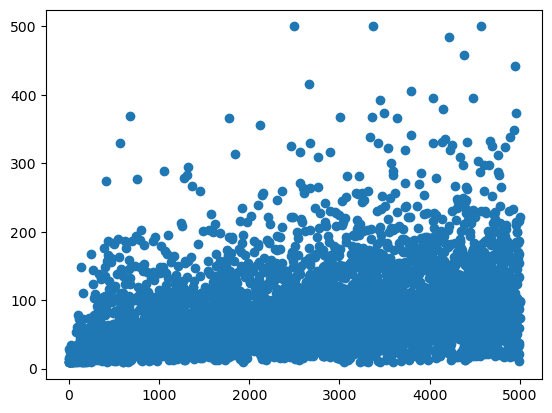

In [3]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.reset()
Q_table = {}
N_table = {}
e = 0.3
arr = []
for ep in tqdm(range(5000)):
    observation, __ = env.reset()
    R = 0
    list_obs_act = []
    reward = 1
    e = e + 0.001
    terminated, truncated = False, False
    for _ in range(1000):
        # User-defined policy function
        observation = numpy.round(observation, 1)
        action, n = policy(observation, Q_table, N_table, e = 0.9)
        list_obs_act.append([str(observation), int(action), n])
        
        if terminated or truncated:
            for i, (obs, act, num) in enumerate(list_obs_act):
                Q_table[obs][act] = Q_table[obs][act] + (1/num)*((R - i)  - Q_table[obs][act])
                #print(Q_table)
            # if R > 100:
            #     print(R)
            arr.append(R)
            break
        else:
            R += reward
        observation, reward, terminated, truncated, info = env.step(action)
    #print('e: ',e)
env.close()
plt.scatter(range(len(arr)), arr)
plt.show()

In [4]:
len(Q_table)

14101

113.0


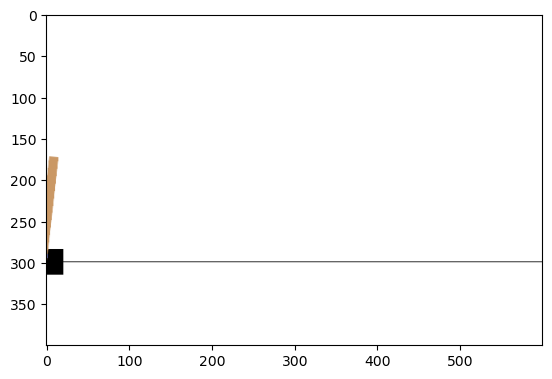

In [5]:
#test 
# only exploit abd no update Q_table
env = gym.make('CartPole-v1', render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render()) # only call this once
observation, __ = env.reset()
R = 0
list_obs_act = []
reward = 1
e = e + 0.001
terminated, truncated = False, False
for _ in range(1000):
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    # User-defined policy function
    observation = numpy.round(observation, 1)
    action, n = policy(observation, Q_table, N_table, e = 1)
    list_obs_act.append([str(observation), int(action), n])

    if terminated or truncated:
        print(R)
        arr.append(R)
        break
    else:
        R += reward
    observation, reward, terminated, truncated, info = env.step(action)